In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os 
import matplotlib.pyplot as plt

In [2]:
pwd = os.getcwd()

In [3]:
df = pd.read_excel (pwd + "/global_superstore_2016.xlsx", sheet_name= "Orders")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.770,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,1.010,Medium
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,1.930,High
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,OFF-AR-5321,Office Supplies,Art,Newell 341,8.560,2,0.0,2.4824,1.580,High
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,1.003,Medium


In [4]:
df.dtypes


Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Postal Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [5]:
df.shape

(51290, 24)

In [6]:
print (df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [7]:
df1=df

### Q1: What is the total sales amount for all orders?

In [8]:
df1["Sales"].sum()

12642501.90988

### Q2: What is the total sales amount for each year? 

##### Step 1: Create a new column that shows the order year.

In [9]:
df1.loc[:, 'Year'] = df1['Order Date'].dt.year
df1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.770,High,2014
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical,2014
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium,2014
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium,2014
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,1.010,Medium,2015
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,1.930,High,2014
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,Office Supplies,Art,Newell 341,8.560,2,0.0,2.4824,1.580,High,2012
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,1.003,Medium,2013


##### Step 2: Grouping sales by each year.

In [10]:
yearly_sales_sum= df1.groupby("Year")["Sales"].sum()

#Formate the output with the dollar $ sign
yearly_sales_sum_formatted = yearly_sales_sum.apply(lambda x: f"${x:,.2f}")

print(yearly_sales_sum_formatted)

Year
2012    $2,259,450.90
2013    $2,677,438.69
2014    $3,405,746.45
2015    $4,299,865.87
Name: Sales, dtype: object


### Q3: What is the total quantity sold for all orders? 

In [11]:
df1["Quantity"].sum()

178312

### Q4: What is the total quantity sold for each year? 

In [12]:
yearly_quantity_sum= df1.groupby("Year")["Quantity"].sum()
yearly_quantity_sum

Year
2012    31443
2013    38111
2014    48136
2015    60622
Name: Quantity, dtype: int64

### Q5: What is the average number of delivery days for orders?

##### Step 1: Create a new column that displays the order's day or time. 

In [13]:
df1.loc[:, 'Delivery Day'] = (df['Ship Date'] - df['Order Date']).dt.days

In [14]:
average_delivery_days= df1["Delivery Day"].mean()
average_delivery_days

3.96937024761162

### Q6: How many orders were returned? 

##### Step 1: Import return data (new sheet).  

In [15]:
df_return = pd.read_excel (pwd + "/global_superstore_2016.xlsx", sheet_name= "Returns")
df_return

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania
...,...,...,...
1074,Yes,IN-2014-DA1345058-41769,Southern Asia
1075,Yes,US-2013-HG14845140-41530,Eastern US
1076,Yes,US-2013-SJ2021582-41543,Central America
1077,Yes,CA-2015-EB13870140-42269,Eastern US


In [16]:
print (df_return['Returned']== "Yes")

0       True
1       True
2       True
3       True
4       True
        ... 
1074    True
1075    True
1076    True
1077    True
1078    True
Name: Returned, Length: 1079, dtype: bool


##### Step 2: Merged data before determining the total returns.

In [17]:
df_merge = pd.merge(left=df1, right=df_return, how="left", left_on= ["Order ID"], right_on= ["Order ID",])
print ("Original dataset: ", len (df1))
print ("Merged dataset: ", len (df_merge))
df_merge

Original dataset:  51290
Merged dataset:  51290


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Delivery Day,Returned,Region_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,221.980,2,0.0,62.1544,40.770,High,2014,2,NaN,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,3709.395,9,0.1,-288.7650,923.630,Critical,2014,2,NaN,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,5175.171,9,0.1,919.9710,915.490,Medium,2014,1,NaN,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,2892.510,5,0.1,-96.5400,910.160,Medium,2014,2,NaN,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,2832.960,8,0.0,311.5200,903.040,Critical,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,65.100,5,0.0,4.5000,1.010,Medium,2015,0,NaN,NaN
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,16.720,5,0.2,3.3440,1.930,High,2014,4,NaN,NaN
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,8.560,2,0.0,2.4824,1.580,High,2012,5,NaN,NaN
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,13.440,2,0.0,2.4000,1.003,Medium,2013,4,NaN,NaN


In [18]:
return_orders_df = df_merge[df_merge['Returned']== "Yes"]

In [19]:
distinct_count = return_orders_df ['Order ID'].nunique() # or return_orders = len(return_orders_df['Order ID'].unique())
print(f"Total returned orders: {distinct_count}")  #print ("Total returned orders: ", return_orders)


Total returned orders: 1079


### Q7: What is the total sales by market / each year? 

In [20]:
market_sales= df_merge.groupby("Market")["Sales"].sum() 
sorted_market_sales= market_sales.sort_values (ascending= False)
print (sorted_market_sales)

Market
Asia Pacific    4.042658e+06
Europe          3.287336e+06
USCA            2.364129e+06
LATAM           2.164605e+06
Africa          7.837732e+05
Name: Sales, dtype: float64


In [21]:
df_merge.groupby(['Market', 'Year'])['Sales'].sum()

Market        Year
Africa        2012    1.271873e+05
              2013    1.444807e+05
              2014    2.290688e+05
              2015    2.830364e+05
Asia Pacific  2012    7.136582e+05
              2013    8.639840e+05
              2014    1.092232e+06
              2015    1.372784e+06
Europe        2012    5.407506e+05
              2013    7.176114e+05
              2014    8.486702e+05
              2015    1.180304e+06
LATAM         2012    3.850982e+05
              2013    4.647333e+05
              2014    6.081408e+05
              2015    7.066329e+05
USCA          2012    4.927566e+05
              2013    4.866293e+05
              2014    6.276350e+05
              2015    7.571081e+05
Name: Sales, dtype: float64

##### Finding 6: We notice that all market tend to consistently increase in sales year over year. But, only the 'USCA' market had a decrease in sales between consecutive years (2012 to 2013).

### Q8: What is the total sales by segment /each year ? 

In [22]:
segment_sales= df_merge.groupby('Segment')["Sales"].sum()
sorted_segment_sales= segment_sales.sort_values (ascending= False)
print (sorted_segment_sales)

Segment
Consumer       6.507949e+06
Corporate      3.824698e+06
Home Office    2.309855e+06
Name: Sales, dtype: float64


In [23]:
df_merge.groupby(['Segment', 'Year'])['Sales'].sum()

Segment      Year
Consumer     2012    1.173671e+06
             2013    1.463760e+06
             2014    1.729255e+06
             2015    2.141263e+06
Corporate    2012    6.916626e+05
             2013    7.744596e+05
             2014    1.064973e+06
             2015    1.293602e+06
Home Office  2012    3.941170e+05
             2013    4.392188e+05
             2014    6.115177e+05
             2015    8.650014e+05
Name: Sales, dtype: float64

##### Finding 8: We can note that the largest segment is 'Consumer,' followed by 'Corporate' and then 'Home Office.' The trend shows that all three segments consistently increased in sales each year.

### Q9: Who are the top 10 customers? 

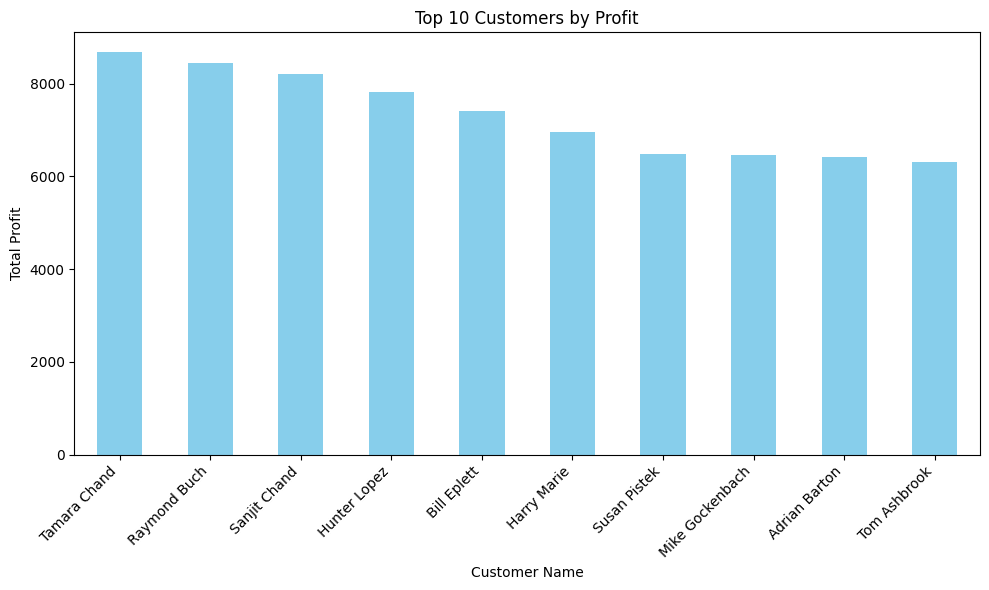

In [24]:
customer_profit = df_merge.groupby('Customer Name')['Profit'].sum() #Group by Customer and sum the Profit
top_customers = customer_profit.sort_values(ascending=False).head(10) #Sort the customers by Profit in descending order

top_customers.plot(kind='bar', figsize=(10, 6), color='skyblue') #Plot the data as a vertical bar chart

#Add title and labels
plt.title('Top 10 Customers by Profit')
plt.xlabel('Customer Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right') 

# Ensure that only the plot is shown
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()  # This ensures that only the plot is displayed

##### Finding 9: The top customer who brings in the most profit to the company is Tamara Chand, followed by Raymond Buch, Sanjit Chand, and rounding out the top ten is Tom Ashbrook.

### Q10: What are the top 6 profit products? 

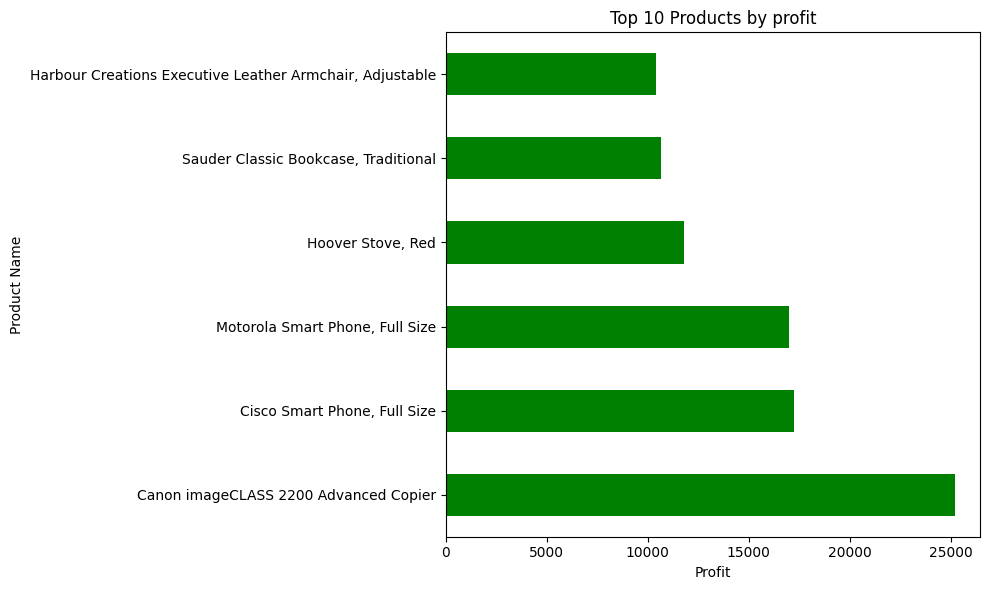

In [25]:
Product_profit = df_merge.groupby('Product Name')['Profit'].sum() #Group by product and sum the profit
top_product = Product_profit.sort_values(ascending=False).head(6) #Sort the customers by profit in descending order

top_product.plot(kind='barh',figsize=(10, 6), color='green') #Plot the data as a vertical bar chart

#Add title and labels
plt.title('Top 10 Products by profit')
plt.xlabel('Profit')
plt.ylabel('Product Name')

# Ensure that only the plot is shown
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()  # This ensures that only the plot is displayed

##### Finding 10: The top-selling product by profit is the Canon imageCLASS, followed by the Cisco Smart, the Motorola Smart Phone, and rounding out the top sex is the Harbour Creations Armchair.

### Q11: What are the top 6 Loss product?  

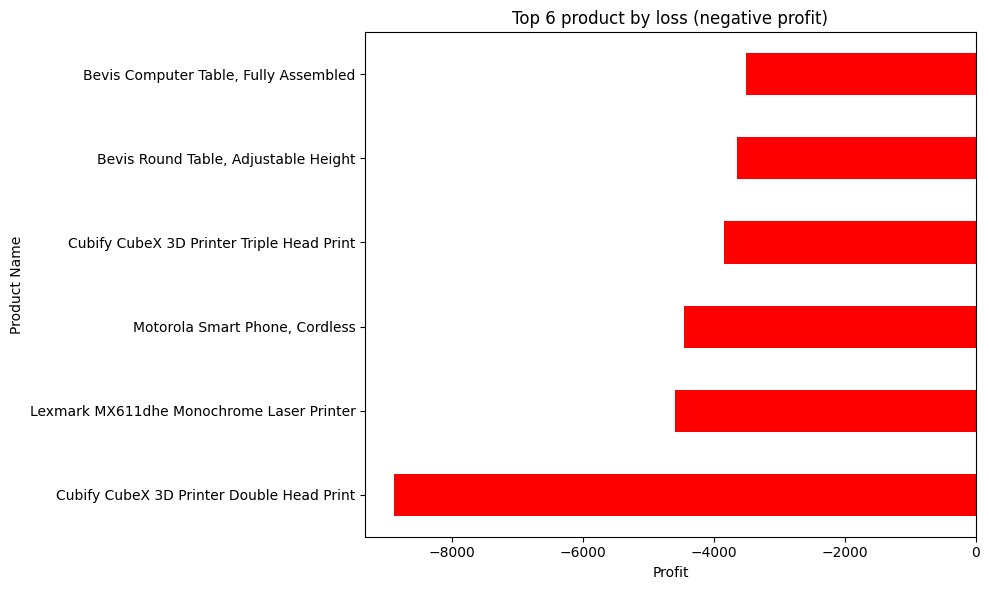

In [26]:
Product_loss = df_merge.groupby('Product Name')['Profit'].sum() #Group by product and sum the profit
Top_loss_product = Product_loss.sort_values(ascending=True).head(6) #Sort the product by profit in ascending order

Top_loss_product.plot(kind='barh',figsize=(10, 6), color='red') #Plot the data as a vertical bar chart

#Add title and labels
plt.title('Top 6 product by loss (negative profit)')
plt.xlabel('Profit')
plt.ylabel('Product Name')

# Ensure that only the plot is shown
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()  # This ensures that only the plot is displayed

##### Finding 11: The top product by Loss or negative profit is the Cubify...Head Print, followed by Lexmark...Laser Printer, Motorola Smart Phone Cordless, and rounding out the top sex is the Bevis Computer Table.

## Descriptive analysis to understand the occurance of the patterns

### Q12: Analyse shipping costs to understand if high shipping costs are associated with low or negative profits

Correlation between Profit and Shipping Cost: 0.3544232046040306
                                                    Shipping Cost       Profit
Product Name                                                                  
Cubify CubeX 3D Printer Triple Head Print              674.820000 -3839.990400
Cubify CubeX 3D Printer Double Head Print              227.196667 -2959.990133
Cisco TelePresence System EX90 Videoconferencin...      24.286500 -1811.078400
Lexmark MX611dhe Monochrome Laser Printer              328.602500 -1147.493250
Zebra GK420t Direct Thermal/Thermal Transfer Pr...     199.500000  -938.280000
Barricks Conference Table, Rectangular                 157.420000  -829.322500
Bevis Round Table, Adjustable Height                    62.209800  -729.978800
Barricks Round Table, Adjustable Height                115.586667  -626.891667
Barricks Round Table, Rectangular                      211.170000  -623.940000
Chromcraft Round Table, Fully Assembled                 78.092000 

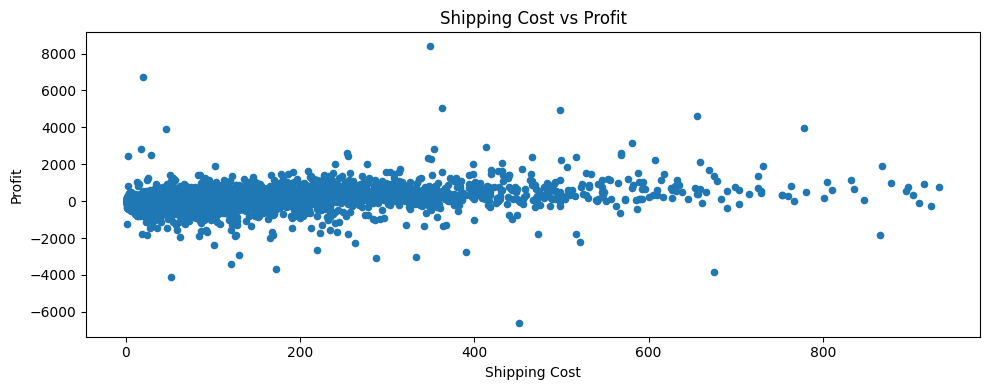

In [32]:
# Correlation between profit and shipping cost
correlation_shipping_profit = df_merge['Profit'].corr(df_merge['Shipping Cost'])
print(f"Correlation between Profit and Shipping Cost: {correlation_shipping_profit}")

# Group by product and calculate average shipping cost and profit
shipping_cost_analysis = df_merge.groupby('Product Name')[['Shipping Cost', 'Profit']].mean().sort_values(by='Profit')
print(shipping_cost_analysis.head(10))  # Show the top 10 products with lowest profits

# Plot Shipping Cost vs. Profit
df_merge.plot.scatter(x='Shipping Cost', y='Profit', title='Shipping Cost vs Profit', figsize=(10, 4))
plt.tight_layout()
plt.show()

##### Finding 12 - A correlation of 0.354 suggests a Low/moderate positive relationship between shipping cost and profit. This means that, generally, as shipping costs increase, profits also tend to increase, but the relationship is not strong. As the shipping cost analysis shows, there are notable exceptions where high shipping costs are associated with significant losses.
#### - The scatter plot shows that many products are clustered around the profit line of 0. This means that many products have profits close to zero, which is concerning because it indicates they are barely breaking even or just covering their costs.

##### Solution: - Reviewing the products: Products with high shipping costs and negative profits should be reviewed for pricing strategies, discount policies, or potential inefficiencies in the supply chain that could be impacting profitability. - Focus on Low-Profit Products: The large number of products with profits close to zero indicates a need to reassess these products' viability in the product line, possibly by optimizing shipping, renegotiating supplier costs, or adjusting pricing strategies.

### Q13: What impact or correlation Does Discounts have on profitability? 

Correlation between Profit and Discount: -0.31649017182727085
                                                    Discount       Profit
Product Name                                                             
Cubify CubeX 3D Printer Triple Head Print           0.500000 -3839.990400
Cubify CubeX 3D Printer Double Head Print           0.533333 -2959.990133
Cisco TelePresence System EX90 Videoconferencin...  0.500000 -1811.078400
Lexmark MX611dhe Monochrome Laser Printer           0.400000 -1147.493250
Zebra GK420t Direct Thermal/Thermal Transfer Pr...  0.700000  -938.280000
Barricks Conference Table, Rectangular              0.350000  -829.322500
Bevis Round Table, Adjustable Height                0.460000  -729.978800
Barricks Round Table, Adjustable Height             0.416667  -626.891667
Barricks Round Table, Rectangular                   0.350000  -623.940000
Chromcraft Round Table, Fully Assembled             0.433333  -607.693000


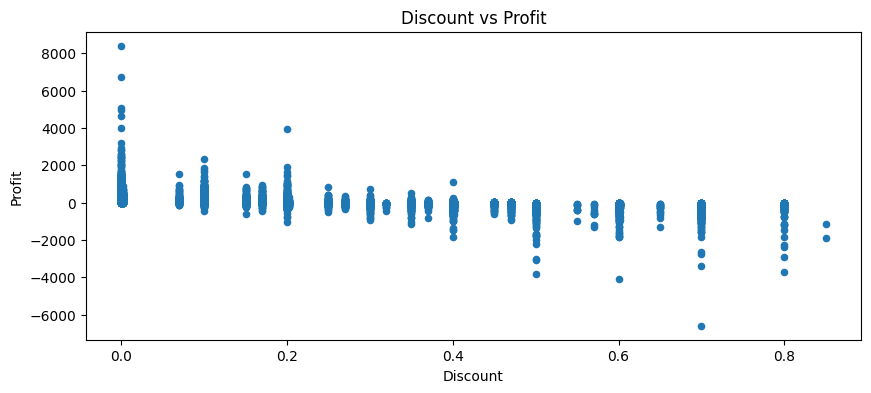

In [28]:
correlation_discount_profit = df_merge['Profit'].corr(df_merge['Discount'])
print(f"Correlation between Profit and Discount: {correlation_discount_profit}")

discount_analysis = df_merge.groupby('Product Name')[['Discount', 'Profit']].mean().sort_values(by='Profit')
print(discount_analysis.head(10)) 

df_merge.plot.scatter(x='Discount', y='Profit', title='Discount vs Profit', figsize=(10, 4))
plt.show()

##### Finding 13: The correlation between Profit and Discount is -0.3165, which indicates a low-moderate negative relationship between the two variables. This means that as discounts increase, profits tend to decrease, and vice versa. This suggests that excessive discounting could harm overall profitability. While discounts can drive sales volume, they need to be carefully managed to ensure that they don't erode profits. The company may need to evaluate whether the increase in sales volume from discounts is enough to compensate for the reduced profit margins.

### Q14: What impact does delivery day have on customer satisfaction and profitability? 

Correlation between Profit and Delivery Day: 0.0017447852467344534
                                                    Delivery Day       Profit
Product Name                                                                 
Cubify CubeX 3D Printer Triple Head Print               0.000000 -3839.990400
Cubify CubeX 3D Printer Double Head Print               4.000000 -2959.990133
Cisco TelePresence System EX90 Videoconferencin...      5.000000 -1811.078400
Lexmark MX611dhe Monochrome Laser Printer               3.750000 -1147.493250
Zebra GK420t Direct Thermal/Thermal Transfer Pr...      1.000000  -938.280000
Barricks Conference Table, Rectangular                  4.333333  -829.322500
Bevis Round Table, Adjustable Height                    3.800000  -729.978800
Barricks Round Table, Adjustable Height                 3.666667  -626.891667
Barricks Round Table, Rectangular                       1.000000  -623.940000
Chromcraft Round Table, Fully Assembled                 4.333333  -607.6930

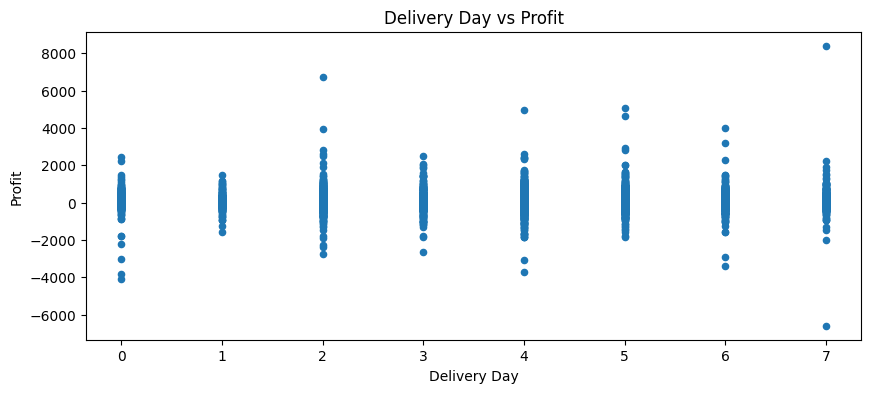

In [29]:
correlation_delivery_profit = df_merge['Profit'].corr(df_merge['Delivery Day'])
print(f"Correlation between Profit and Delivery Day: {correlation_delivery_profit}")

delivery_analysis = df_merge.groupby('Product Name')[['Delivery Day', 'Profit']].mean().sort_values(by='Profit')
print(delivery_analysis.head(10)) 

df_merge.plot.scatter(x='Delivery Day', y='Profit', title='Delivery Day vs Profit', figsize=(10, 4))
plt.show()

##### Finding 14: The correlation coefficient of 0.0017 suggests that Delivery Day has little to no impact on Profit in a linear sense (Weak Relationship).It can also be noticed that products with high negative profits show a range of delivery days, but no strong relationship is evident between delivery days and profitability. Since delivery days do not explain profit variations well, it is better to consider other factors. 

### Q15: What impact does the order priority have on profitability? 

Order Priority
Low         24.197958
High        27.119122
Medium      29.361729
Critical    31.593124
Name: Profit, dtype: float64


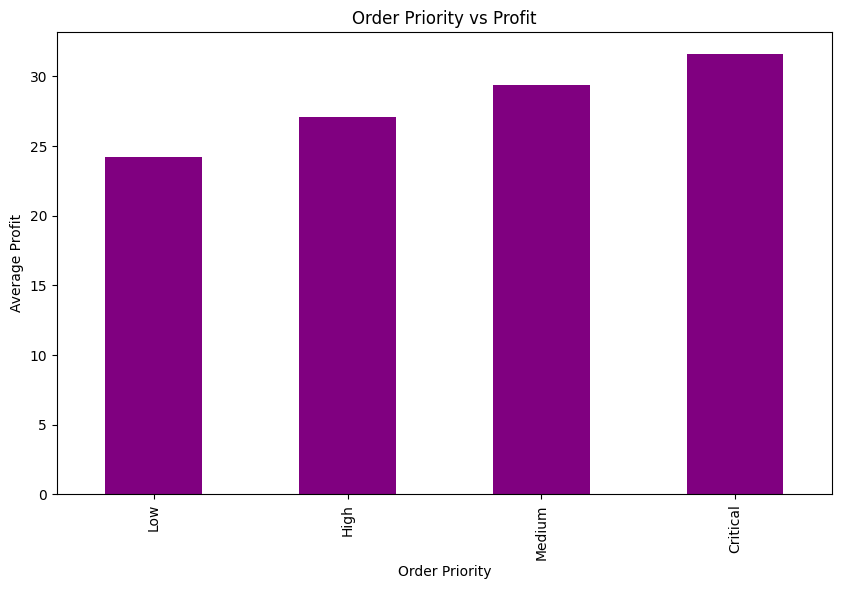

In [30]:
priority_analysis = df_merge.groupby('Order Priority')['Profit'].mean().sort_values()
print(priority_analysis)

priority_analysis.plot(kind='bar', title='Order Priority vs Profit', figsize=(10, 6), color='purple')
plt.ylabel('Average Profit')
plt.show()

##### Finding 15: The outputed information shoes that as the Order Priority increases from Low to Critical, the average profit also increases. This means that, on average, orders with higher priority tend to have higher profits. Since higher prioriteted orders contribute to the company’s profitability, understanding that higher-priority orders are more profitable can help focus efforts on optimizing these orders to maximize overall profitability (i.e optimizing customer relationship, resource allocation, product and sales strategies).

### Q16: What correlation do segment and market have on profitability? 

In [31]:
# Convert 'Segment' and 'Market' to numerical values
label_encoder_segment = LabelEncoder()
df_merge['Segment_encoded'] = label_encoder_segment.fit_transform(df_merge['Segment'])

label_encoder_market = LabelEncoder()
df_merge['Market_encoded'] = label_encoder_market.fit_transform(df_merge['Market'])

# Calculate correlations
correlation_segment_profit = df_merge['Segment_encoded'].corr(df_merge['Profit'])
correlation_market_profit = df_merge['Market_encoded'].corr(df_merge['Profit'])

print(f"Correlation between Segment and Profit: {correlation_segment_profit}")
print(f"Correlation between Market and Profit: {correlation_market_profit}")


Correlation between Segment and Profit: 0.0027970402666889506
Correlation between Market and Profit: 0.0028472700468975044


##### Finding 16: Both correlations are very close to 0, indicating a very weak relationship between the categorical variables ('Segment' and 'Market') and profit, this means that neither 'Segment' nor 'Market' has a significant impact on profit based on the linear correlation analysis..

### Conclusion: After analyzing the correlations, it’s clear that most factors have a weak relationship with profit. However, some aspects warrant further investigation: shipping costs have a moderate positive correlation with profit, while higher discounts tend to reduce profits. Understanding these relationships more deeply, along with how sales vary across markets and segments, can help the company optimize processes and enhance profitability.